data location: http://www.wakegov.com/tax/taxratesfees/Pages/default.aspx

# Import Packages

In [121]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

plt.style.use('default')

# Access Data

### Data came from here: 'http://www.wakegov.com/tax/taxratesfees/Pages/default.aspx'

### Access data and place into the df dataframe

In [151]:
df_raw = pd.read_csv('wctaxrate.txt',delimiter=' ',index_col=False)
df_raw.head()

,2019,2018,2017,2016*,2015,2014,2013,2012,2011,2010,...,1996,1995,1994,1993,1992*,1991,1990,1989,1988,1987
0,0.7207,0.6544,0.615,0.6005,0.6145,0.578,0.534,0.534,0.534,0.534,...,0.63,0.63,0.76,0.76,0.66,0.88,0.88,0.79,0.72,0.59


# Prepare Data

In [245]:
def prep_data(_df):
    def assessment(x):
        if '*' in x:
            return 'yes'
        else:
            return 'no'
    
    return (_df
            .transpose()
            .reset_index()
            .rename(columns={0:'wcTax', 'index':'Year'})
            .assign(assessmentYear = lambda df: np.where(df['Year'].str.contains("\*"),'yes','no'),  ## Create a column that indicates a new property assessment
                    Year = lambda df: df.Year.str.replace('*','',regex=True)                         ## Remove the * from the Year column to prepare a numeric index column
             )
            .astype({'Year':int})                                                                    ## Change the data type of the Year column to integer
            .set_index('Year')
            .sort_index(ascending=True)                                                              ## Sort the index in ascending order
            .assign(pctIncrease = lambda df: df.wcTax.pct_change().round(decimals=2),                ## Calculate the pctIncrease of taxes each year
                    RollingAvg = lambda df: df.wcTax.rolling(5).mean().round(decimals=2),            ## Calculate the 5 year rolling average
                    wcTaxRank = lambda df: df.wcTax.rank(method='min',ascending=False),
            )                                  
            
    )

## Prepare the main data

In [246]:
df = prep_data(df_raw)
df

,wcTax,assessmentYear,pctIncrease,RollingAvg,wcTaxRank
Year,,,,,
1987,0.5900,no,NaN,NaN,23.0
1988,0.7200,no,0.22,NaN,8.0
1989,0.7900,no,0.10,NaN,3.0
1990,0.8800,no,0.11,NaN,1.0
1991,0.8800,no,0.00,0.77,1.0
1992,0.6600,yes,-0.25,0.79,10.0
1993,0.7600,no,0.15,0.79,4.0
1994,0.7600,no,0.00,0.79,4.0
1995,0.6300,no,-0.17,0.74,13.0


## Prepare the main data based on values if the BONDS DIDN'T PASS for 2019

In [254]:
df_no_bonds_raw = prep_data(df_raw)
df_no_bonds = (df_no_bonds_raw
              .drop(['pctIncrease'], axis=1)
              .replace(0.7207,0.7207-.0380)
              .assign(pctIncrease = lambda df: df.wcTax.pct_change().round(decimals=2),
                      RollingAvg = lambda df: df.wcTax.rolling(5).mean().round(decimals=2))
              .drop('wcTaxRank', axis=1)
)



display(df.tail(3), df_no_bonds.tail(3))

,wcTax,assessmentYear,pctIncrease,RollingAvg,wcTaxRank
Year,,,,,
2017,0.6150,no,0.02,0.59,17.0
2018,0.6544,no,0.06,0.61,11.0
2019,0.7207,no,0.10,0.64,7.0


,wcTax,assessmentYear,RollingAvg,pctIncrease
Year,,,,
2017,0.6150,no,0.59,0.02
2018,0.6544,no,0.61,0.06
2019,0.6827,no,0.64,0.04


## Explore the Data

### Preview the first and last 5 rows

In [249]:
display(df.head(), df.tail())

,wcTax,assessmentYear,pctIncrease,RollingAvg,wcTaxRank
Year,,,,,
1987,0.59,no,NaN,NaN,23.0
1988,0.72,no,0.22,NaN,8.0
1989,0.79,no,0.10,NaN,3.0
1990,0.88,no,0.11,NaN,1.0
1991,0.88,no,0.00,0.77,1.0


,wcTax,assessmentYear,pctIncrease,RollingAvg,wcTaxRank
Year,,,,,
2015,0.6145,no,0.06,0.56,18.0
2016,0.6005,yes,-0.02,0.57,22.0
2017,0.6150,no,0.02,0.59,17.0
2018,0.6544,no,0.06,0.61,11.0
2019,0.7207,no,0.10,0.64,7.0


### View data types and missing values

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1987 to 2019
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wcTax           33 non-null     float64
 1   assessmentYear  33 non-null     object 
 2   pctIncrease     32 non-null     float64
 3   RollingAvg      29 non-null     float64
 4   wcTaxRank       33 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.5+ KB


### View the numeric column summary statistics

In [232]:
(df
 .describe()
 .transpose()
)

,count,mean,std,min,25%,50%,75%,max
wcTax,33.0,0.637576,0.096080,0.53,0.56,0.62,0.68,0.88
pctIncrease,32.0,0.011562,0.104638,-0.25,0.00,0.00,0.07,0.22
RollingAvg,29.0,0.632759,0.077731,0.53,0.58,0.61,0.66,0.79
wcTaxRank,33.0,16.121212,9.016504,1.00,9.00,17.00,25.00,28.00


### View the number of assessment years

In [233]:
(df
 .assessmentYear
 .value_counts()
)

no     29
yes     4
Name: assessmentYear, dtype: int64

# Analyze Data

In [234]:
df.head()

,wcTax,assessmentYear,pctIncrease,RollingAvg,wcTaxRank
Year,,,,,
1987,0.59,no,NaN,NaN,23.0
1988,0.72,no,0.22,NaN,8.0
1989,0.79,no,0.10,NaN,3.0
1990,0.88,no,0.11,NaN,1.0
1991,0.88,no,0.00,0.77,1.0


In [104]:
fc

,wcTax,pctIncrease,RollingAvg,assessmentYear
Year,,,,
1987,0.59,NaN,NaN,no
1988,0.72,0.220339,NaN,no
1989,0.79,0.097222,NaN,no
1990,0.88,0.113924,NaN,no
1991,0.88,0.000000,0.772,no
1992,0.66,-0.250000,0.786,yes
1993,0.76,0.151515,0.794,no
1994,0.76,0.000000,0.788,no
1995,0.63,-0.171053,0.738,no


In [105]:
fc.iloc[0:len(fc)-1,1]=np.nan

In [106]:
fc.head()

,wcTax,pctIncrease,RollingAvg,assessmentYear
Year,,,,
1987,0.59,NaN,NaN,no
1988,0.72,NaN,NaN,no
1989,0.79,NaN,NaN,no
1990,0.88,NaN,NaN,no
1991,0.88,NaN,0.772,no


In [107]:
fc.tail()

,wcTax,pctIncrease,RollingAvg,assessmentYear
Year,,,,
2015,0.61,NaN,0.559,no
2016,0.60,NaN,0.572,yes
2017,0.62,NaN,0.588,no
2018,0.65,NaN,0.612,no
2019,0.72,0.107692,0.641,no


## Add rank column

In [108]:
rank = df.copy()

In [109]:
rank.head()

,wcTax,assessmentYear,pctIncrease,RollingAvg,wcTaxRank
Year,,,,,
1987,0.59,no,NaN,NaN,23.0
1988,0.72,no,0.220,NaN,8.0
1989,0.79,no,0.097,NaN,3.0
1990,0.88,no,0.114,NaN,1.0
1991,0.88,no,0.000,0.772,1.0


In [110]:
rank.reset_index(inplace=True)
rank.set_index('wcTaxRank', inplace=True)

In [111]:
rank.sort_index(inplace=True)

In [112]:
rank.head()

,Year,wcTax,assessmentYear,pctIncrease,RollingAvg
wcTaxRank,,,,,
1.0,1990,0.88,no,0.114,NaN
1.0,1991,0.88,no,0.000,0.772
3.0,1989,0.79,no,0.097,NaN
4.0,1993,0.76,no,0.152,0.794
4.0,1994,0.76,no,0.000,0.788


In [113]:
rank['Year']=rank.Year.astype('object')

In [114]:
rank.dtypes

Year               object
wcTax             float64
assessmentYear     object
pctIncrease       float64
RollingAvg        float64
dtype: object

In [115]:
rank.head()

,Year,wcTax,assessmentYear,pctIncrease,RollingAvg
wcTaxRank,,,,,
1.0,1990,0.88,no,0.114,NaN
1.0,1991,0.88,no,0.000,0.772
3.0,1989,0.79,no,0.097,NaN
4.0,1993,0.76,no,0.152,0.794
4.0,1994,0.76,no,0.000,0.788


# Export to CSV

### Export Actual

In [117]:
df.to_csv('wctaxes.csv')

# Visualize

In [118]:
## Set Global Appearance Colors
size=(14,10)
carolinaBlue='#4B9CD3'
ncStateRed='#CC0000'
fcColor='#83FA12'
gridAlpha=.25

## Create X axis to show every 2 years
x=df.index.to_list()[1::2]
x.append(df.index.max()+1)


## Find the min and max years to use in a title
minYear = df.index.to_list()[0]
maxYear = df.index.to_list()[len(df)-1]

## Find the min year property tax and value
minTaxYear = df.wcTax.idxmin()
minTaxValue= df.wcTax.min()

## Find the max year property tax and value
maxTaxYear = df.wcTax.idxmax()
maxTaxValue= df.wcTax.max()

## Find the current rate and year
currRate = df.iloc[len(df)-1,0]
currYear = df.index.max()

## Find the current rate, find rate without bonds
fcRate = fc.iloc[len(fc)-1,0]
fcInc = fc.iloc[len(fc)-1,1]

## Find the rate in 2007 prior ot the recession
recRate = fc.loc[2007,['wcTax']].max()

## Calculate difference between 2007 and current
diff = df.loc[(df.index==2007) | (df.index==2019),['wcTax']].copy()
diff['pctInc'] = diff.wcTax.pct_change()
diffRec =diff.pctInc.max()

## Calculate difference between 2007 and without bond rate
rate2007 = df.loc[2007]['wcTax']
fc2019 = fc.loc[2019,'wcTax']
fcdiff = pd.Series([rate2007,fc2019])
fcdiffRate = fcdiff.pct_change().iloc[1]


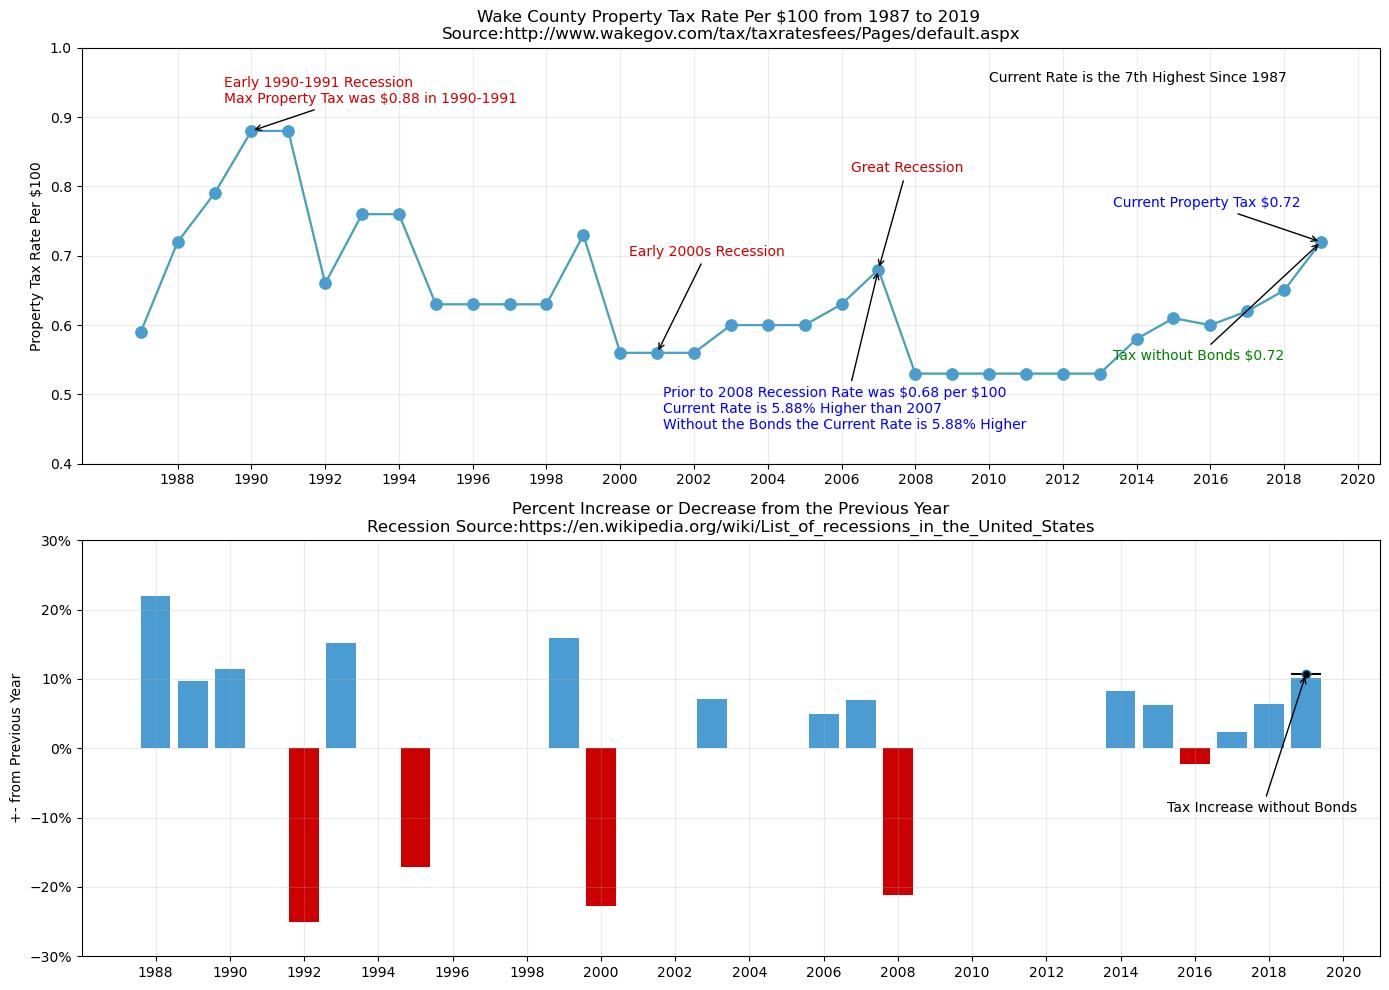

In [120]:
fig, (ax1,ax2) = plt.subplots(2,figsize=size)

###################################################################################
## Line plot ax1
ax1.plot(fc.index,fc['wcTax'], marker='o', markersize=8, color=fcColor, label='CurrentTax')
ax1.plot(df.index,df['wcTax'], marker='o', markersize=8, color=carolinaBlue, label='Without Bonds')



## Apprearance ax1
ax1.grid(alpha=gridAlpha)
ax1.set_xticks(x)
ax1.text(2010,.95,'Current Rate is the 7th Highest Since 1987')
ax1.set_title('Wake County Property Tax Rate Per $100 from {} to {} \nSource:http://www.wakegov.com/tax/taxratesfees/Pages/default.aspx'.format(minYear, maxYear))
ax1.set_ylabel('Property Tax Rate Per $100')
ax1.set_ylim(.40,1)
#ax1.annotate('Max Property Tax was ${:.2f}\nin 1990-1991'.format(maxTaxValue),[maxTaxYear,maxTaxValue], xytext=(0.05,.3), xycoords='axes fraction')
ax1.annotate('Current Property Tax ${:.2f}'.format(currRate),[currYear,currRate], xytext=(-150,25), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'), color='blue')
ax1.annotate('Tax without Bonds ${:.2f}'.format(fcRate),[currYear,fcRate], xytext=(-150,-85), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'), color='green')
ax1.annotate('Prior to 2008 Recession Rate was ${:.2f} per \$100 \nCurrent Rate is {:.2%} Higher than 2007 \nWithout the Bonds the Current Rate is {:.2%} Higher'.format(recRate,diffRec,fcdiffRate),[2007,recRate], 
             xytext=(-155,-115), textcoords='offset points', arrowprops=dict(arrowstyle='->'), color='blue')
ax1.annotate('Early 1990-1991 Recession\nMax Property Tax was ${:.2f} in 1990-1991'.format(maxTaxValue),[1990,df.loc[1990,'wcTax']], xytext=(-20,20), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'), color=ncStateRed)
ax1.annotate('Early 2000s Recession',[2001,df.loc[2001,'wcTax']], xytext=(-20,70), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'), color=ncStateRed)
ax1.annotate('Great Recession',[2007,df.loc[2007,'wcTax']], xytext=(-20,70), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'), color=ncStateRed)
###################################################################################
## Bar plot ax2
ax2.plot(fc.index,fc['pctIncrease'], marker='o', markerfacecolor='black')
ax2.bar(df.index,df['pctIncrease'], color=(df['pctIncrease'] > 0).map({True: carolinaBlue,
                                                                      False: ncStateRed}))

##Appearnace ax2
ax2.hlines(fcInc,2018.6,2019.4, color='k')
ax2.grid(alpha=gridAlpha)
ax2.set_xticks(x)
ax2.set_ylim(-.3,.3)
ax2.set_title('Percent Increase or Decrease from the Previous Year\nRecession Source:https://en.wikipedia.org/wiki/List_of_recessions_in_the_United_States')
ax2.set_ylabel('+- from Previous Year')
ax2.yaxis.set_major_formatter(PercentFormatter(1))
ax2.annotate('Tax Increase without Bonds',[2019,fc.loc[2019,'pctIncrease']], xytext=(-100,-100), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'))

###################################################################################
## Bar plot for ranks

fig.tight_layout()
plt.savefig('images//wcTax.jpg')